In [9]:
from sklearn.datasets import load_iris 
iris_datasets = load_iris() 
iris_datasets

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
# Shape 150 x 4 i.e 4 columns and 150 rows
print(iris_datasets.data.shape)
# Input
print(iris_datasets.feature_names)
# Output
print(iris_datasets.target_names)
# 0 => 'setosa', 1=> 'versicolor', 2 => 'virginica'
print(iris_datasets.target)

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
from sklearn.model_selection import train_test_split 

# Before making the split, shuffle the dataset using pseduo-random number generator
# Training set contains 75% and test set contains 25% of the data
X_train, X_test, y_train, y_test =  train_test_split(
    iris_datasets['data'], iris_datasets['target'], random_state=0
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


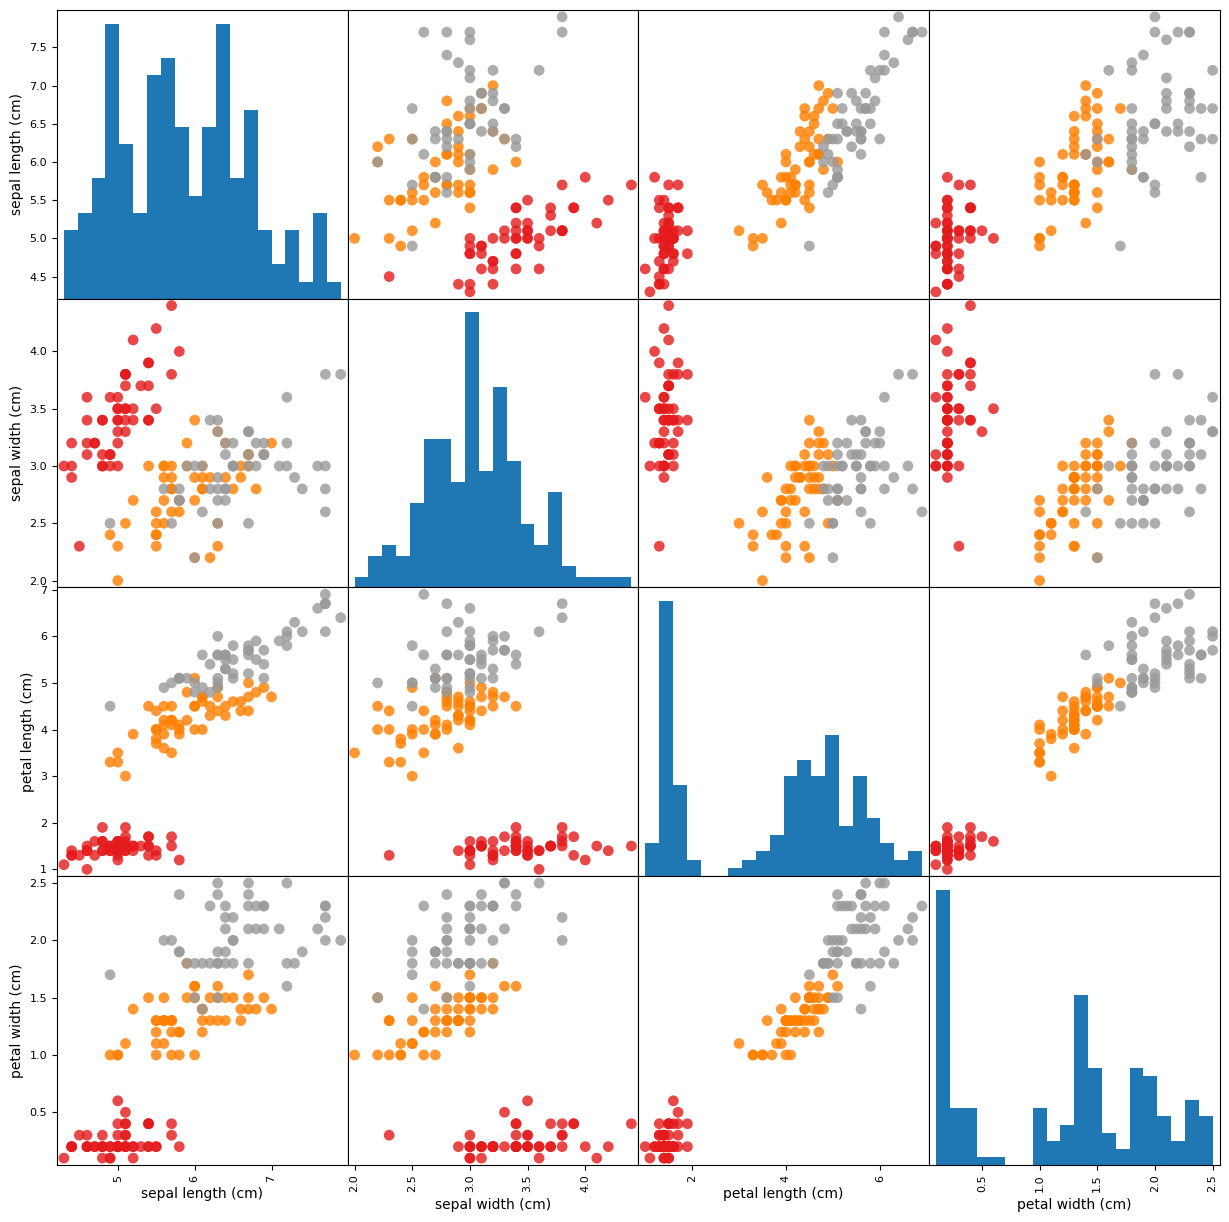

In [23]:
import pandas as pd
from pandas.plotting import scatter_matrix
import mglearn
import matplotlib.pyplot as plot

iris_dataframe = pd.DataFrame(iris_datasets['data'], columns=iris_datasets.feature_names)

scatter_matrix(
    iris_dataframe, 
    # c=y_train,
    c=iris_datasets['target'],
    figsize=(15,15),
    marker='o',
    hist_kwds={'bins': 20},
    s=60,
    alpha=0.8,
    # cmap=mglearn.cm3
    cmap='Set1'
)
plot.show()



In [25]:
# KNN example for 1 neighbor 
from sklearn.neighbors import KNeighborsClassifier

# Store the training dataset
knn = KNeighborsClassifier(n_neighbors=1)

# Build model on training dataset 
knn.fit(X_train, y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [28]:
import numpy as np 

# Sepal length = 5cm, sepal width = 2.9cm, petal length = 1cm, petal width = 0.2cm
X_new = np.array([[5, 2.9, 1, 0.2]]) 
print(X_new.shape)

(1, 4)


In [30]:
prediction = knn.predict(X_new)
prediction
print(iris_datasets.target_names[prediction])

['setosa']


In [32]:
y_prediction = knn.predict(X_test)
y_prediction


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [34]:
np.mean(y_prediction == y_test)

np.float64(0.9736842105263158)

In [ ]:
# Load breast cancer dataset - Classification problem

from sklearn.datasets import load_breast_cancer 

cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [37]:
print("Shape of cancer data: ", cancer.data.shape)

Shape of cancer data:  (569, 30)


In [40]:
np.bincount(cancer.target)

array([212, 357])

In [44]:
print({str(n) : int(v) for n,v in zip(cancer.target_names, np.bincount(cancer.target))})

{'malignant': 212, 'benign': 357}


In [4]:
# Boston housing dataset - Regression problem
# from sklearn.datasets import load_boston 
# boston = load_boston()
# boston.data.shape()
import mglearn 

X, y = mglearn.datasets.load_extended_boston()
print(X.shape, y.shape)


(506, 104) (506,)
